In [1]:
# Main Library 
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Models
from xgboost.sklearn import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

# Loss function
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score


import warnings
warnings.filterwarnings('ignore')

# Get the Data

## Load data

In [239]:
diamond= pd.read_csv('train.csv').drop(['Unnamed: 0'], axis=1)
diamond

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
2,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
3,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
4,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
...,...,...,...,...,...,...,...,...,...,...
43035,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58
43036,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
43037,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
43038,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


## Get insights into the data

In [240]:
diamond.shape

(43040, 10)

In [241]:
diamond.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [242]:
diamond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43040 entries, 0 to 43039
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    43040 non-null  float64
 1   cut      43040 non-null  object 
 2   color    43040 non-null  object 
 3   clarity  43040 non-null  object 
 4   depth    43040 non-null  float64
 5   table    43040 non-null  float64
 6   price    43040 non-null  int64  
 7   x        43040 non-null  float64
 8   y        43040 non-null  float64
 9   z        43040 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.3+ MB


#### We have three categorical features we just look at their values

In [243]:
diamond['cut'].value_counts()

Ideal        17424
Premium      11031
Very Good     9407
Good          3910
Fair          1268
Name: cut, dtype: int64

In [244]:
diamond['color'].value_counts()

G    9080
E    7723
F    7527
H    6640
D    5555
I    4297
J    2218
Name: color, dtype: int64

In [245]:
diamond['clarity'].value_counts()

SI1     10363
VS2      9981
SI2      7380
VS1      6479
VVS2     3959
VVS1     2838
IF       1483
I1        557
Name: clarity, dtype: int64

In [246]:
diamond.describe()

,carat,depth,table,price,x,y,z
count,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000
mean,0.796964,61.746080,57.439542,3942.706343,5.724376,5.728122,3.534367
std,0.481455,1.435246,2.240196,4023.534556,1.132496,1.159641,0.714543
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.380000,61.000000,56.000000,940.000000,4.660000,4.670000,2.870000
50%,0.710000,61.800000,57.000000,2388.000000,5.710000,5.720000,3.530000
75%,1.030000,62.500000,59.000000,5309.250000,6.500000,6.500000,4.020000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


# Discover and visulaize the Data

## Visualizing the data


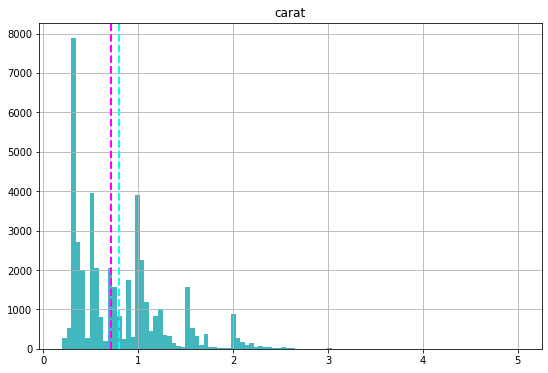

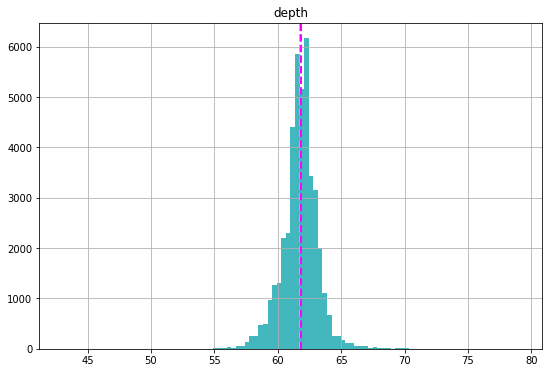

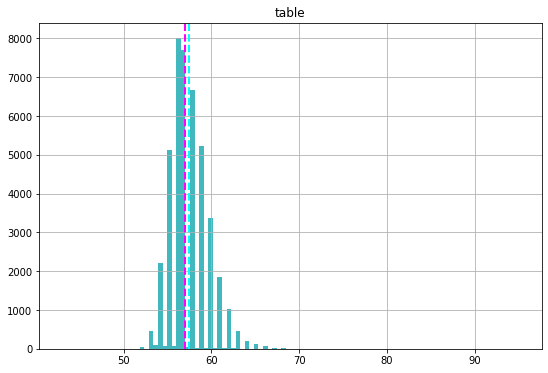

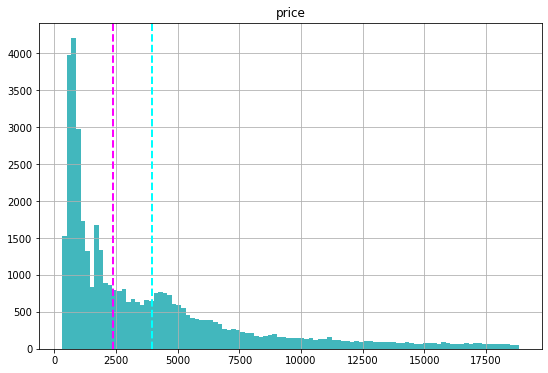

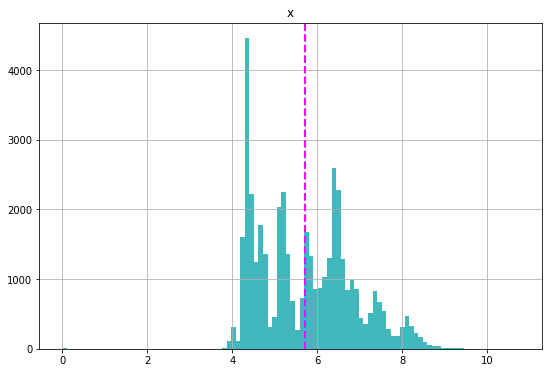

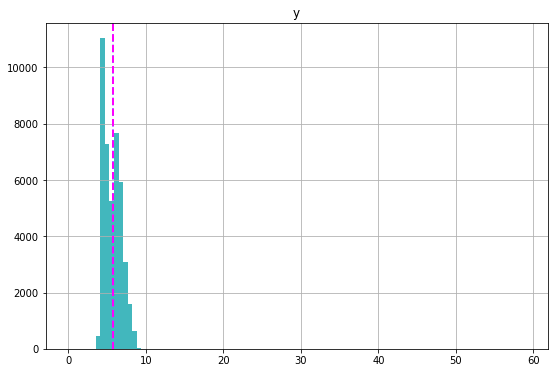

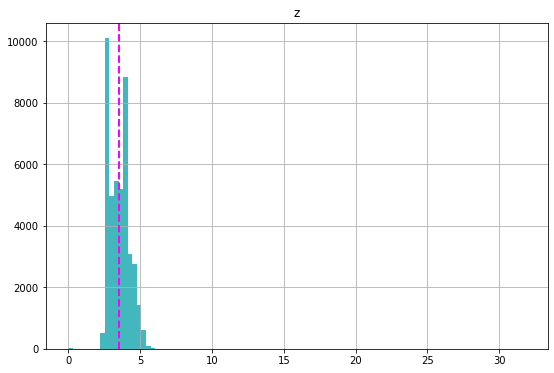

In [247]:
numeric_features_cols=diamond.describe().columns

for col in numeric_features_cols:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = diamond[col]
    
    feature.hist(bins=100, ax = ax, color= '#42b7bd')
    ax.axvline(feature.mean(), color='cyan', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='magenta', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

#### copy diamond data to df


In [291]:
df= diamond.copy()

In [292]:
numeric_features=df[numeric_features_cols]
numeric_features

,carat,depth,table,price,x,y,z
0,0.21,59.8,61.0,326,3.89,3.84,2.31
1,0.29,62.4,58.0,334,4.20,4.23,2.63
2,0.31,63.3,58.0,335,4.34,4.35,2.75
3,0.24,62.8,57.0,336,3.94,3.96,2.48
4,0.24,62.3,57.0,336,3.95,3.98,2.47
...,...,...,...,...,...,...,...
43035,0.72,62.7,59.0,2757,5.69,5.73,3.58
43036,0.72,60.8,57.0,2757,5.75,5.76,3.50
43037,0.72,63.1,55.0,2757,5.69,5.75,3.61
43038,0.86,61.0,58.0,2757,6.15,6.12,3.74


for col in numeric_features_cols:
    plt.figure(figsize=(12,12))
    sns.boxplot(x=df[col])
    plt.show()

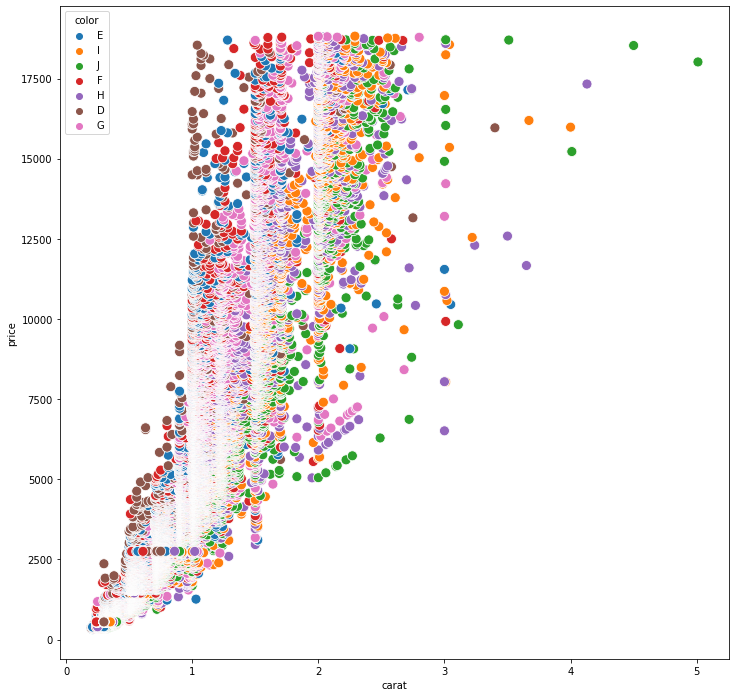

In [293]:
#scatter plot to show how features are relatated
#most important feature

plt.figure(figsize=(12, 12))
sns.scatterplot(data= df, x='carat' , y= 'price', hue='color' , s= 100)


## Looking for correlations

In [294]:
correlation = df.corr()
correlation

,carat,depth,table,price,x,y,z
carat,1.000000,0.022599,0.191260,0.923801,0.974368,0.946001,0.948625
depth,0.022599,1.000000,-0.292084,-0.014393,-0.031088,-0.034945,0.088335
table,0.191260,-0.292084,1.000000,0.136975,0.204768,0.191469,0.159775
price,0.923801,-0.014393,0.136975,1.000000,0.887483,0.863748,0.860625
x,0.974368,-0.031088,0.204768,0.887483,1.000000,0.969541,0.966909
y,0.946001,-0.034945,0.191469,0.863748,0.969541,1.000000,0.944215
z,0.948625,0.088335,0.159775,0.860625,0.966909,0.944215,1.000000


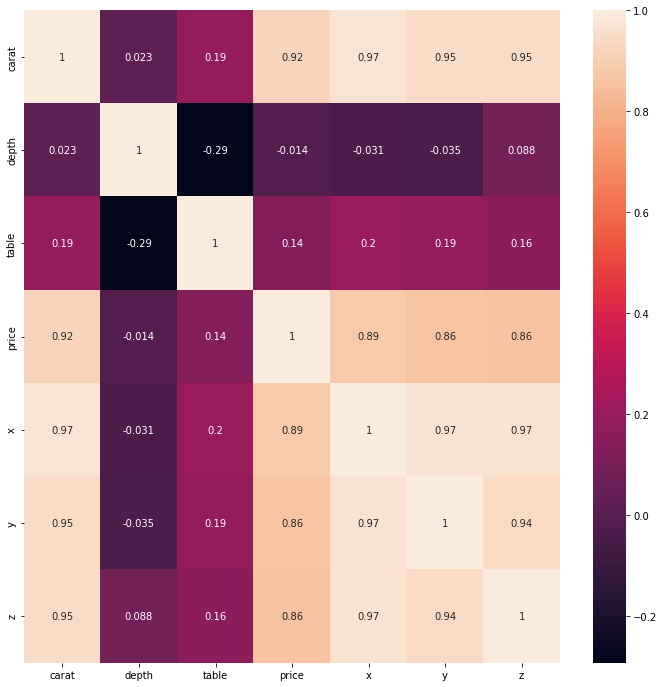

In [295]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(method='pearson'),annot=True)
plt.show()

# Prepare the Data for ML algorithms

## replace zero value in x,y,z features with median value

In [296]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(numeric_features)
N = imputer.transform(numeric_features)

In [254]:
numeric_features_tr = pd.DataFrame(N, columns=numeric_features_cols, index=numeric_features.index)
numeric_features_tr

,carat,depth,table,price,x,y,z
0,0.21,59.8,61.0,326.0,3.89,3.84,2.31
1,0.29,62.4,58.0,334.0,4.20,4.23,2.63
2,0.31,63.3,58.0,335.0,4.34,4.35,2.75
3,0.24,62.8,57.0,336.0,3.94,3.96,2.48
4,0.24,62.3,57.0,336.0,3.95,3.98,2.47
...,...,...,...,...,...,...,...
43035,0.72,62.7,59.0,2757.0,5.69,5.73,3.58
43036,0.72,60.8,57.0,2757.0,5.75,5.76,3.50
43037,0.72,63.1,55.0,2757.0,5.69,5.75,3.61
43038,0.86,61.0,58.0,2757.0,6.15,6.12,3.74


## Remove outliers using Log transformation 


There are many outliers and the data is right-skewed. Log transformation will transform data to normal or close to normal distribuation

In [255]:
def log_transformer(df, numeric_features_cols): 
    for f in numeric_features_cols:
        df[f]=np.log(df[f])
    return df
 


In [256]:
numeric_features= log_transformer(numeric_features_tr, numeric_features_cols)
numeric_features

,carat,depth,table,price,x,y,z
0,-1.560648,4.091006,4.110874,5.786897,1.358409,1.345472,0.837248
1,-1.237874,4.133565,4.060443,5.811141,1.435085,1.442202,0.966984
2,-1.171183,4.147885,4.060443,5.814131,1.467874,1.470176,1.011601
3,-1.427116,4.139955,4.043051,5.817111,1.371181,1.376244,0.908259
4,-1.427116,4.131961,4.043051,5.817111,1.373716,1.381282,0.904218
...,...,...,...,...,...,...,...
43035,-0.328504,4.138361,4.077537,7.921898,1.738710,1.745716,1.275363
43036,-0.328504,4.107590,4.043051,7.921898,1.749200,1.750937,1.252763
43037,-0.328504,4.144721,4.007333,7.921898,1.738710,1.749200,1.283708
43038,-0.150823,4.110874,4.060443,7.921898,1.816452,1.811562,1.319086


In [257]:
# we delete non_numerical columns 
num_features= df.drop(['cut','color','clarity'], axis=1 )
num_features

,carat,depth,table,price,x,y,z
0,0.21,59.8,61.0,326,3.89,3.84,2.31
1,0.29,62.4,58.0,334,4.20,4.23,2.63
2,0.31,63.3,58.0,335,4.34,4.35,2.75
3,0.24,62.8,57.0,336,3.94,3.96,2.48
4,0.24,62.3,57.0,336,3.95,3.98,2.47
...,...,...,...,...,...,...,...
43035,0.72,62.7,59.0,2757,5.69,5.73,3.58
43036,0.72,60.8,57.0,2757,5.75,5.76,3.50
43037,0.72,63.1,55.0,2757,5.69,5.75,3.61
43038,0.86,61.0,58.0,2757,6.15,6.12,3.74


# Prepare the data for machine learning alghorithm

## Handling text and categorial attributs

In [258]:
def dis_plot(X):
    sns.histplot(x=X ,bins = 30,color= 'pink')  
    plt.show()

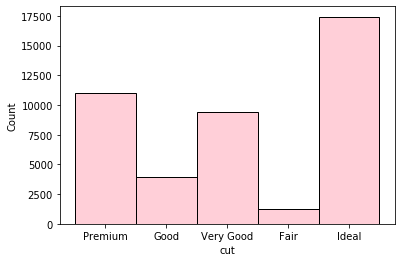

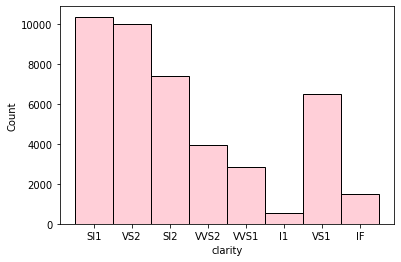

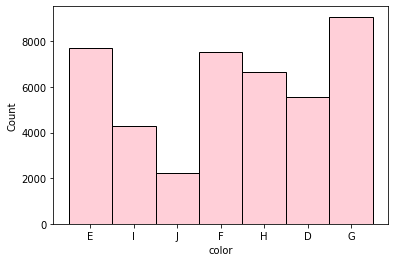

In [259]:
categorical_features_cols = ['cut','clarity', 'color']
for col in categorical_features_cols: 
    dis_plot(df[col])

## use method to convert ordinal feature to oridinal encoder
because values of features not sorted by importance

In [260]:
def ordinal_encoder(feature, feature1, feature2):

    cut= feature.replace(['Fair','Good', 'Very Good', 'Premium', 'Ideal'], [0, 1, 2, 3, 4],) #inplace =True)
    clarity= feature1.replace(['I1','SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF' ],[0, 1, 2, 3, 4, 5, 6, 7])# inplace =True)
    color= feature2.replace(['D', 'E','F','G', 'H', 'I', 'J'],[6, 5, 4,3,2,1,0])
    ordinal= cut.join(clarity).join(color)
    return ordinal 

In [261]:
ordinal_cate_features=ordinal_encoder(df[['cut']],df[['clarity']], df[['color']] )
ordinal_cate_features

,cut,clarity,color
0,3,2,5
1,3,3,1
2,1,1,0
3,2,5,0
4,2,6,1
...,...,...,...
43035,3,2,6
43036,4,2,6
43037,1,2,6
43038,3,1,2


### plot cateorical feature after transform them to numeric value 

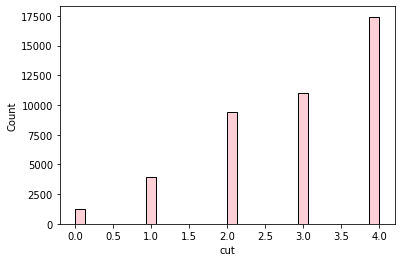

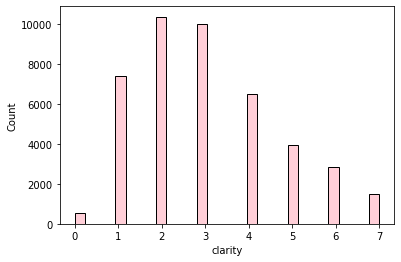

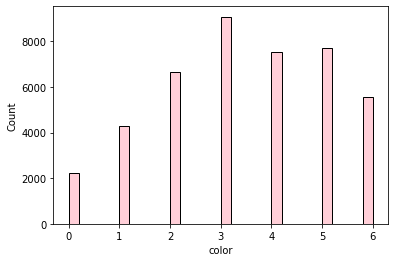

In [263]:

categorical_features_cols = ['cut','clarity', 'color']
for col in categorical_features_cols: 
    dis_plot(ordinal_cate_features[col])

In [264]:
df_prep= num_features.join(ordinal_cate_features)
df_prep

,carat,depth,table,price,x,y,z,cut,clarity,color
0,0.21,59.8,61.0,326,3.89,3.84,2.31,3,2,5
1,0.29,62.4,58.0,334,4.20,4.23,2.63,3,3,1
2,0.31,63.3,58.0,335,4.34,4.35,2.75,1,1,0
3,0.24,62.8,57.0,336,3.94,3.96,2.48,2,5,0
4,0.24,62.3,57.0,336,3.95,3.98,2.47,2,6,1
...,...,...,...,...,...,...,...,...,...,...
43035,0.72,62.7,59.0,2757,5.69,5.73,3.58,3,2,6
43036,0.72,60.8,57.0,2757,5.75,5.76,3.50,4,2,6
43037,0.72,63.1,55.0,2757,5.69,5.75,3.61,1,2,6
43038,0.86,61.0,58.0,2757,6.15,6.12,3.74,3,1,2


In [265]:
corr1= df_prep.corr()
corr1

,carat,depth,table,price,x,y,z,cut,clarity,color
carat,1.000000,0.022599,0.191260,0.923801,0.974368,0.946001,0.948625,-0.149462,-0.358092,-0.289262
depth,0.022599,1.000000,-0.292084,-0.014393,-0.031088,-0.034945,0.088335,-0.220594,-0.062631,-0.044708
table,0.191260,-0.292084,1.000000,0.136975,0.204768,0.191469,0.159775,-0.431534,-0.167485,-0.035701
price,0.923801,-0.014393,0.136975,1.000000,0.887483,0.863748,0.860625,-0.069090,-0.157169,-0.176747
x,0.974368,-0.031088,0.204768,0.887483,1.000000,0.969541,0.966909,-0.141201,-0.375593,-0.264321
y,0.946001,-0.034945,0.191469,0.863748,0.969541,1.000000,0.944215,-0.135690,-0.360160,-0.256271
z,0.948625,0.088335,0.159775,0.860625,0.966909,0.944215,1.000000,-0.164145,-0.368501,-0.260951
cut,-0.149462,-0.220594,-0.431534,-0.069090,-0.141201,-0.135690,-0.164145,1.000000,0.195899,0.026669
clarity,-0.358092,-0.062631,-0.167485,-0.157169,-0.375593,-0.360160,-0.368501,0.195899,1.000000,-0.031105
color,-0.289262,-0.044708,-0.035701,-0.176747,-0.264321,-0.256271,-0.260951,0.026669,-0.031105,1.000000


<Figure size 864x864 with 0 Axes>

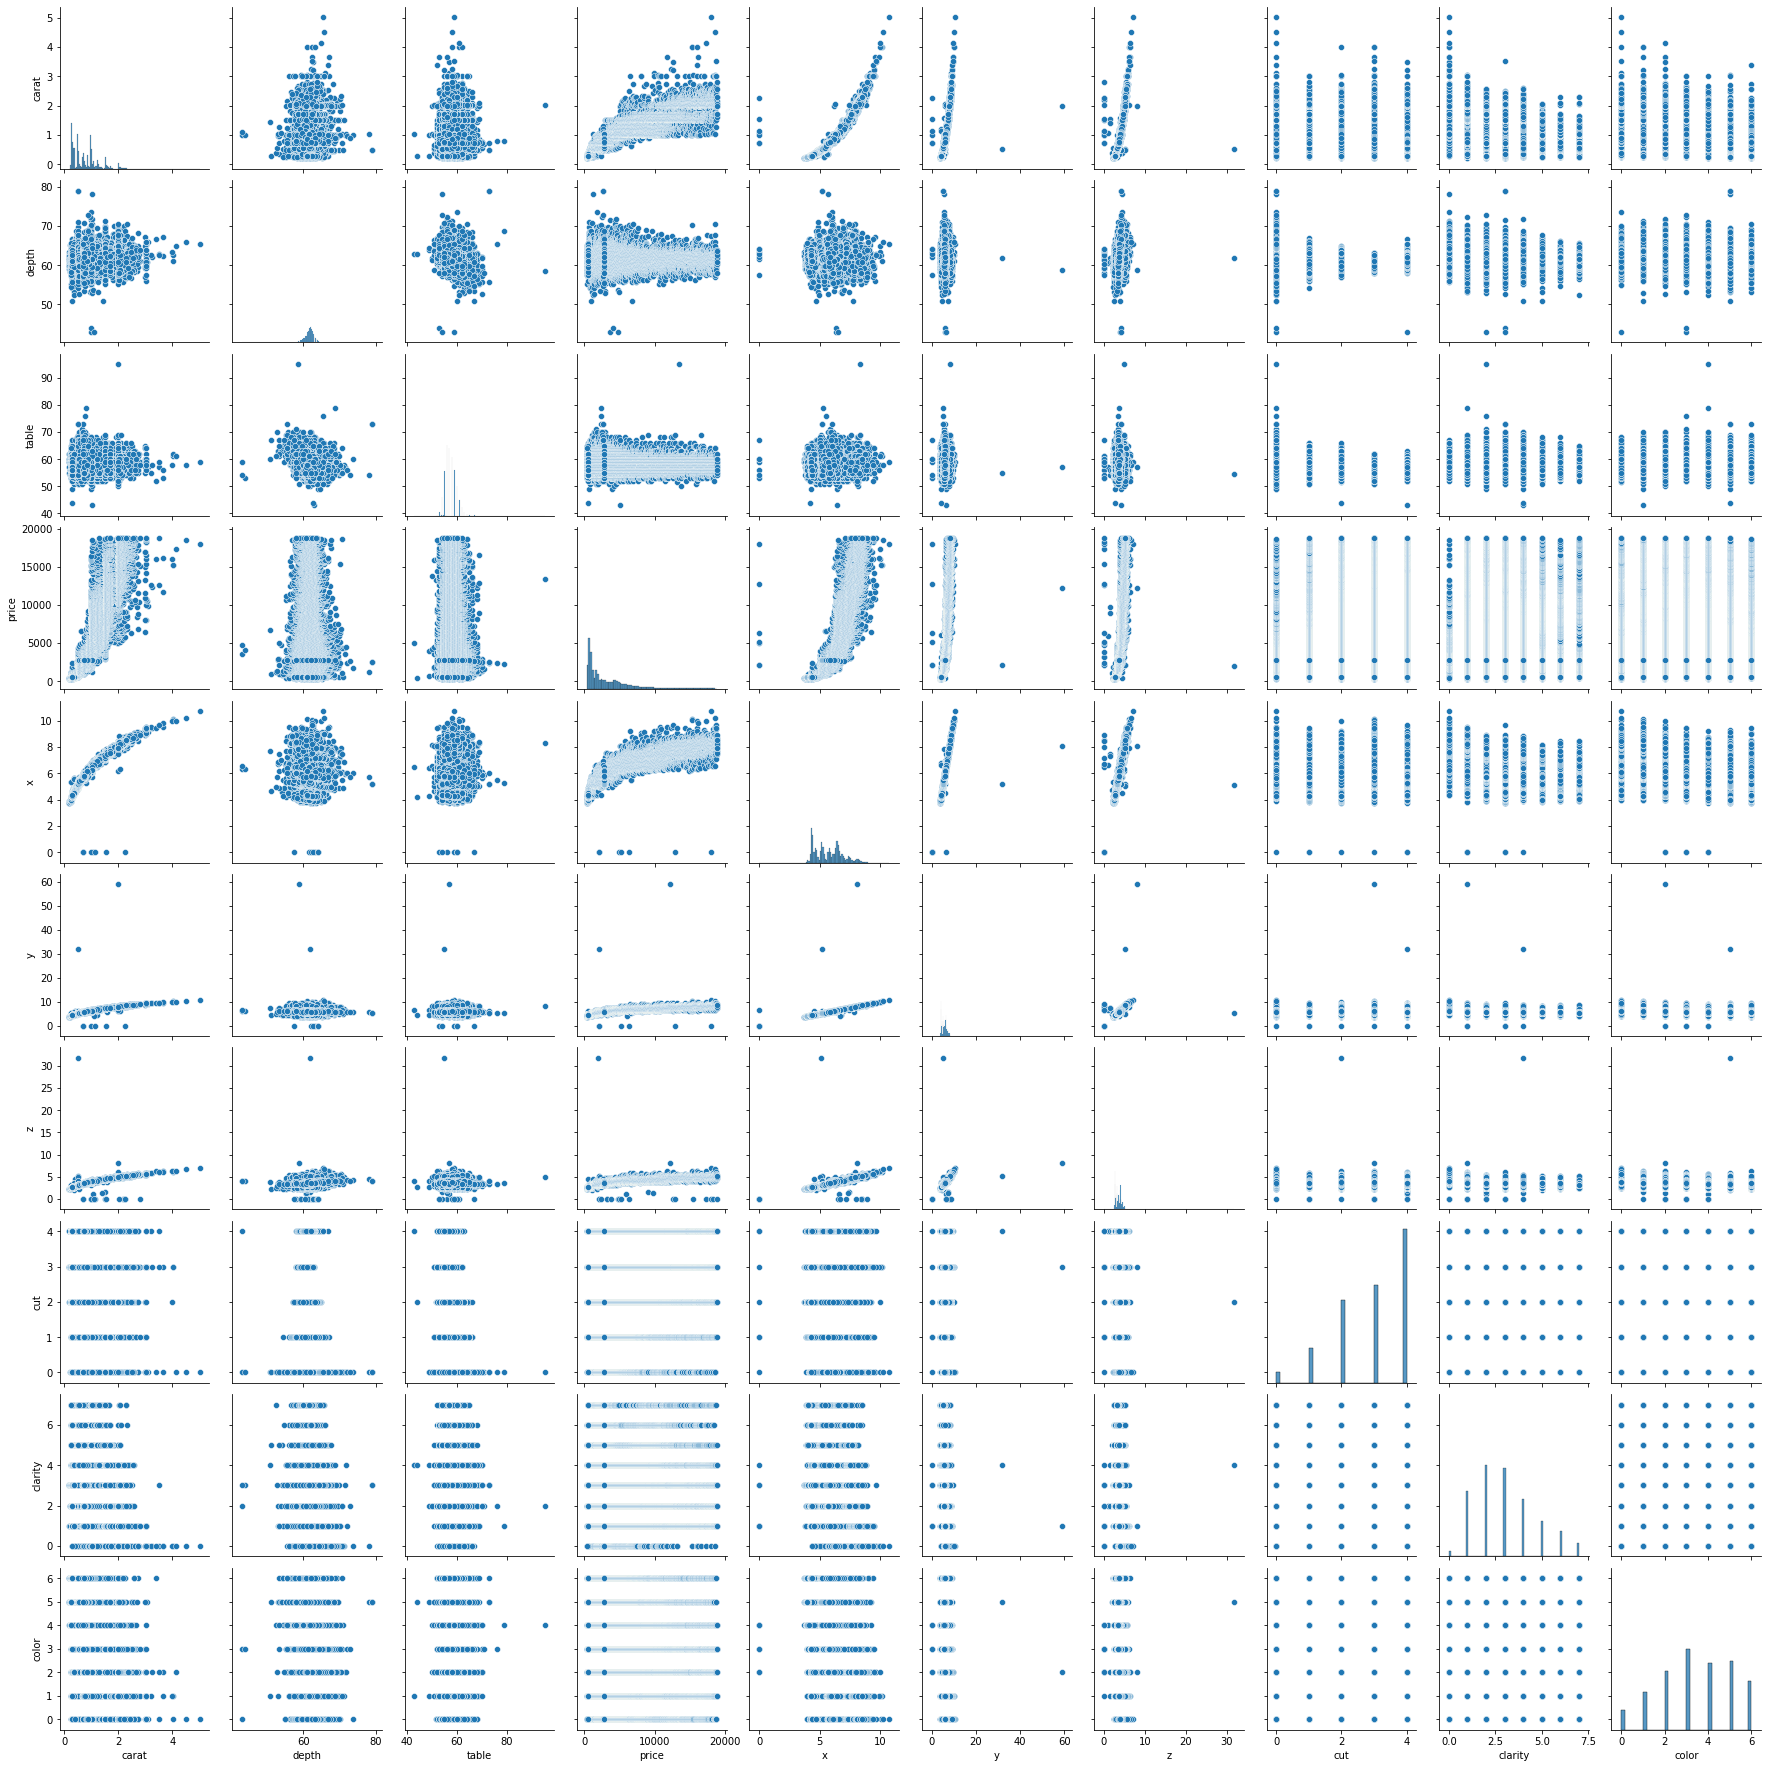

In [266]:
plt.figure(figsize=(12,12))
sns.pairplot(data= df_prep)

# Split train to x-train && y-train And select the model


In [267]:
X_df= df_prep.drop(['price'], axis=1)
y_df= df_prep[['price']]
X_df

,carat,depth,table,x,y,z,cut,clarity,color
0,0.21,59.8,61.0,3.89,3.84,2.31,3,2,5
1,0.29,62.4,58.0,4.20,4.23,2.63,3,3,1
2,0.31,63.3,58.0,4.34,4.35,2.75,1,1,0
3,0.24,62.8,57.0,3.94,3.96,2.48,2,5,0
4,0.24,62.3,57.0,3.95,3.98,2.47,2,6,1
...,...,...,...,...,...,...,...,...,...
43035,0.72,62.7,59.0,5.69,5.73,3.58,3,2,6
43036,0.72,60.8,57.0,5.75,5.76,3.50,4,2,6
43037,0.72,63.1,55.0,5.69,5.75,3.61,1,2,6
43038,0.86,61.0,58.0,6.15,6.12,3.74,3,1,2


In [268]:
def RMSE(y_test, pred):
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)
    return rmse


In [269]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=42)

In [270]:

models=[
    
    ('linear', LinearRegression() ),
    ('KNN', KNeighborsRegressor(n_neighbors = 8, metric = 'minkowski', p = 2)),
    ('SVR', SVR(kernel='rbf')),
    ('XGB', XGBRegressor()),
    ('RandomForest', RandomForestRegressor()),
    ('DecisionTree', SVR(kernel='rbf')),
    
]
acc=[]
rms=[]
name=[]
result=[]
pred_models=[]
for model in models:
    model_name, model_obj = model[0], model[1]
    model_obj.fit(X_train, y_train)
    y_pred= model_obj.predict(X_test)
    rms.append(RMSE(y_test, y_pred))
    acc.append(r2_score(y_test, y_pred))
    name.append(model_name)
    result= pd.DataFrame({'model_name': name,
                             'RMSE': rms,
                              'accuracy': acc})                                  
                    

In [271]:
result

,model_name,RMSE,accuracy
0,linear,1188.314979,0.910916
1,KNN,848.376178,0.954594
2,SVR,4216.969176,-0.121861
3,XGB,540.777702,0.981551
4,RandomForest,545.736406,0.981211
5,DecisionTree,4216.969176,-0.121861


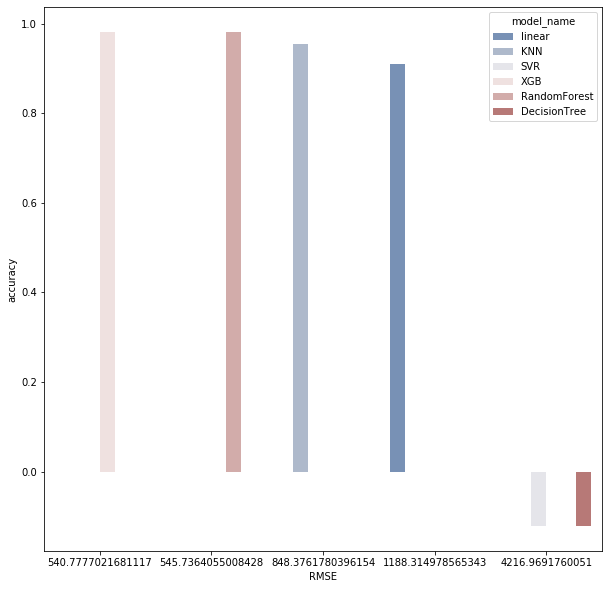

In [273]:
plt.figure(figsize=(10,10))
sns.barplot(data=result, x="RMSE",y='accuracy', hue='model_name', color='#42b7bd', palette = 'vlag')

# Fine And Tune the model

In [274]:
#from sklearn.model_selection import GridSearchCV

In [275]:
"""def gridSearch(model, parameter, x_train, y_train):
    grid_search = GridSearchCV(model, parameter, cv=5,scoring='neg_mean_squared_error',return_train_score=True)
    return grid_search.fit(x_train, y_train)"""

"def gridSearch(model, parameter, x_train, y_train):\n    grid_search = GridSearchCV(model, parameter, cv=5,scoring='neg_mean_squared_error',return_train_score=True)\n    return grid_search.fit(x_train, y_train)"

In [276]:
"""#Random forest  

param_grid = [
{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

grid_=gridSearch(forest,param_grid, X_train, y_train )"""

"#Random forest  \n\nparam_grid = [\n{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},\n{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},\n]\n\ngrid_=gridSearch(forest,param_grid, X_train, y_train )"

In [277]:
#grid_.best_params_

In [278]:
#final_model = grid_.best_estimator_

In [279]:
#final_model

# Evaluate the System on the Test Set


In [280]:
test= pd.read_csv('test.csv').drop(['Unnamed: 0'], axis=1)
data=test.copy()
data.shape

(10900, 9)

In [281]:
Numcol=['carat', 'depth','table','x','y','z']
imputer.fit(data[Numcol])
NN = imputer.transform(data[Numcol])

num_tr = pd.DataFrame(NN, columns=Numcol, index=data[Numcol].index)
num_tr


,carat,depth,table,x,y,z
0,0.23,61.5,55.0,3.95,3.98,2.43
1,0.23,56.9,65.0,4.05,4.07,2.31
2,0.26,61.9,55.0,4.07,4.11,2.53
3,0.23,59.4,61.0,4.00,4.05,2.39
4,0.23,62.8,56.0,3.93,3.90,2.46
...,...,...,...,...,...,...
10895,0.70,62.8,60.0,5.59,5.65,3.53
10896,0.70,63.1,59.0,5.67,5.58,3.55
10897,0.70,60.5,59.0,5.71,5.76,3.47
10898,0.70,61.2,59.0,5.69,5.72,3.49


In [282]:
data_tr=log_transformer(num_tr, Numcol)
data_tr

,carat,depth,table,x,y,z
0,-1.469676,4.119037,4.007333,1.373716,1.381282,0.887891
1,-1.469676,4.041295,4.174387,1.398717,1.403643,0.837248
2,-1.347074,4.125520,4.007333,1.403643,1.413423,0.928219
3,-1.469676,4.084294,4.110874,1.386294,1.398717,0.871293
4,-1.469676,4.139955,4.025352,1.368639,1.360977,0.900161
...,...,...,...,...,...,...
10895,-0.356675,4.139955,4.094345,1.720979,1.731656,1.261298
10896,-0.356675,4.144721,4.077537,1.735189,1.719189,1.266948
10897,-0.356675,4.102643,4.077537,1.742219,1.750937,1.244155
10898,-0.356675,4.114147,4.077537,1.738710,1.743969,1.249902


In [284]:
ordinal_data=ordinal_encoder(test[['cut']],test[['clarity']], test[['color']] )
ordinal_data

,cut,clarity,color
0,4,1,5
1,1,4,5
2,2,2,2
3,2,4,2
4,4,4,0
...,...,...,...
10895,2,3,5
10896,2,4,6
10897,2,3,5
10898,2,3,5


In [285]:
all_test= num_tr.join(ordinal_data)
all_test

,carat,depth,table,x,y,z,cut,clarity,color
0,-1.469676,4.119037,4.007333,1.373716,1.381282,0.887891,4,1,5
1,-1.469676,4.041295,4.174387,1.398717,1.403643,0.837248,1,4,5
2,-1.347074,4.125520,4.007333,1.403643,1.413423,0.928219,2,2,2
3,-1.469676,4.084294,4.110874,1.386294,1.398717,0.871293,2,4,2
4,-1.469676,4.139955,4.025352,1.368639,1.360977,0.900161,4,4,0
...,...,...,...,...,...,...,...,...,...
10895,-0.356675,4.139955,4.094345,1.720979,1.731656,1.261298,2,3,5
10896,-0.356675,4.144721,4.077537,1.735189,1.719189,1.266948,2,4,6
10897,-0.356675,4.102643,4.077537,1.742219,1.750937,1.244155,2,3,5
10898,-0.356675,4.114147,4.077537,1.738710,1.743969,1.249902,2,3,5


In [300]:
XGB_final_pred = models[3][1].predict(all_test)

In [301]:
da= pd.read_csv('test.csv')
index_col= da[['Unnamed: 0']]

In [303]:
index_col['price']= XGB_final_pred

In [304]:
index_col.to_csv('Diamond_Regression.csv', index=None )